In [1]:
import math
import numpy as np
from sympy import*
from sympy.interactive import init_printing
init_printing(pretty_print=True, use_latex="mathjax")
x,y=var("x y",real=True)
from anastruct.fem.system import SystemElements
import matplotlib.pyplot as plt


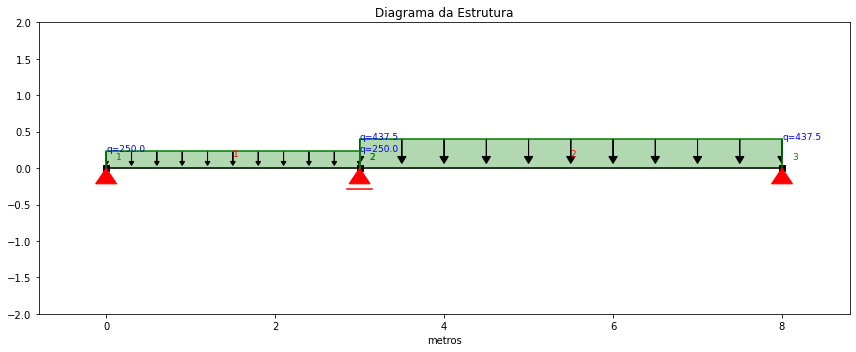

C:\Users\alana\AppData\Local\Temp\ipykernel_21232\2667616114.py:54: SymPyDeprecationWarning: 

Eq(expr) with a single argument with the right-hand side
defaulting to 0 is deprecated. Use Eq(expr, 0) instead.

See https://docs.sympy.org/latest/explanation/active-deprecations.html#deprecated-eq-expr
for details.

This has been deprecated since SymPy version 1.5. It
will be removed in a future version of SymPy.

  zero_1=L_span1+np.max(solve(Eq(func_Fy(L_span1)+q_span2*x),x))
C:\Users\alana\AppData\Local\Temp\ipykernel_21232\2667616114.py:68: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


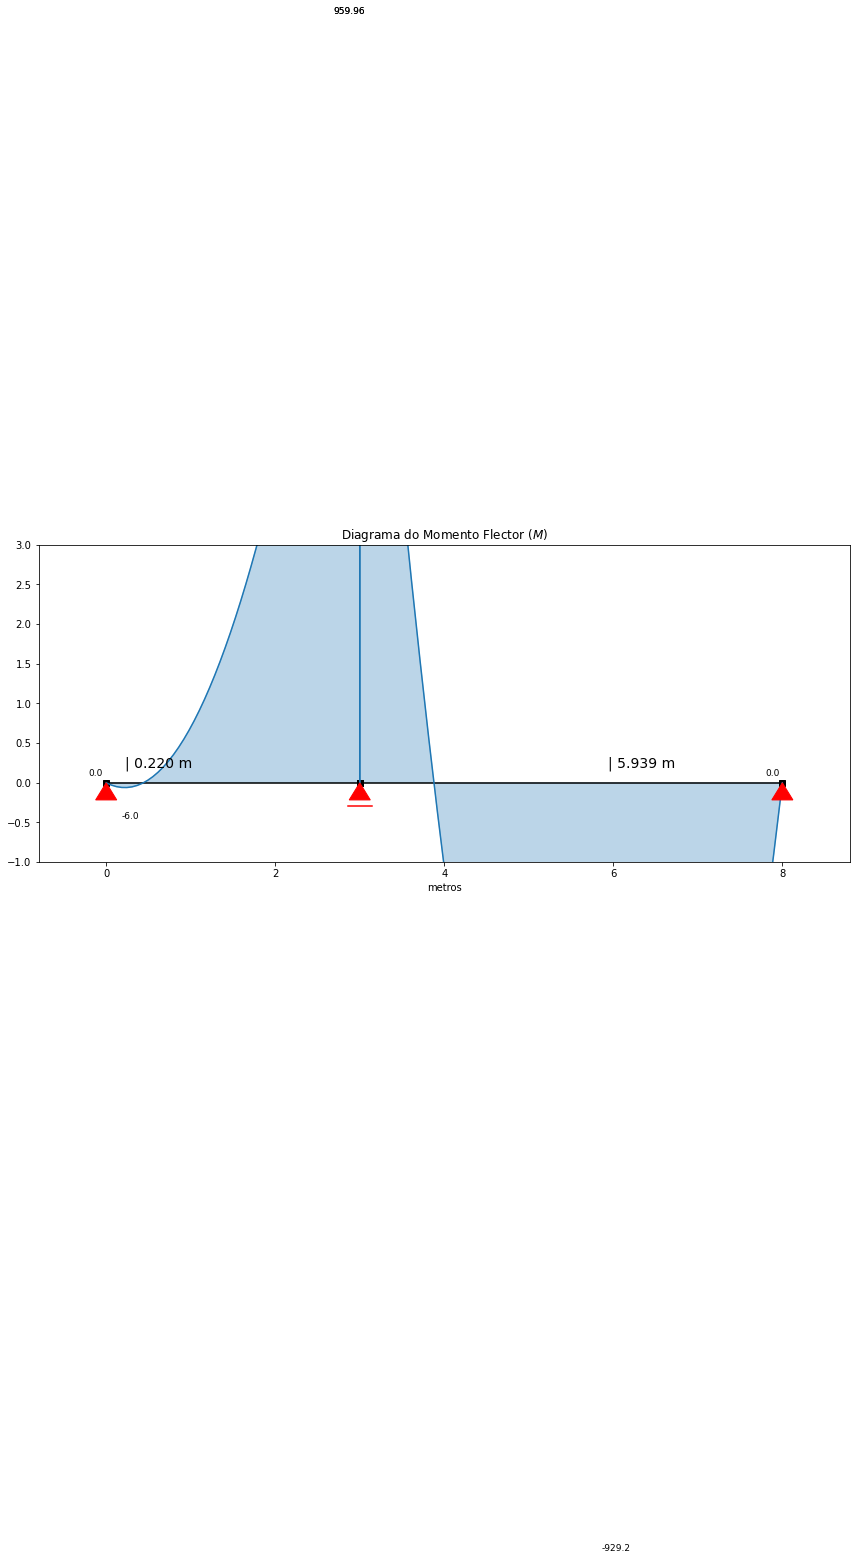

A localização do Momento Máximo positivo no primeiro vão ocorre aos {zero:.3} metros e é de {integrate(func_Fy(x),(x,0,zero)):.3} kNm
A localização do Momento Máximo positivo no segundo vão ocorre aos {zero_1:.3} metros e é de {-M_positivo_2} kNm
O Momento máximo negativo é de {M_negativo} kNm


1

In [2]:
def f_3apoios(L_span1,L_span2,q1,q2,load_factor):
     L = L_span1 + L_span2
     q_span1 = load_factor * q1
     q_span2 = load_factor * q2
     q = q_span1 + q_span2
     EA = 15000
     EI = 5000

     # Estrutura
     ss = SystemElements(load_factor=1,EA=EA, EI=EI)
     ss.add_element(location=[[0, 0], [L_span1, 0]])     #Vão 1
     ss.add_element(location=[[L_span1,0],[L,0]])        #Vão 2

     ss.add_support_hinged(node_id=1)                    #Suporte 1
     ss.add_support_roll(node_id=2, direction=2)         #Suporte 2
     ss.add_support_hinged(node_id=3)                    #Suporte 3
     ss.q_load(element_id=[1], q=-q_span1, direction='element') #Carga Vão 1
     ss.q_load(element_id=[2], q=-q_span2, direction='element') #Carga Vão 2

     ss.solve()

     fig=ss.show_structure(show=False,
                         figsize=(12,5),
                         scale=0.6)
     plt.title("Diagrama da Estrutura")
     plt.xlabel("metros")
     plt.tight_layout()
     plt.show()
     # Apoios Força Vertical, Fy:
     Fy_1=round(ss.get_node_results_system(node_id=1)["Fy"],3)
     Fy_2=round(ss.get_node_results_system(node_id=2)["Fy"],3)
     Fy_3=round(ss.get_node_results_system(node_id=3)["Fy"],3)
     x=var("x",interval=(0, L))

     def func_Fy(x):
        if x == 0:
            return Fy_1+ q_span1 * x
        elif (x > 0) & (x < L_span1):
            return Fy_1+ q_span1 * x
        elif (x==L_span1):
            return Fy_1+ q_span1*L_span1+ Fy_2
        elif (x>L_span1) & (x<L):
            return Fy_1+ q_span1*L_span1+Fy_2+q_span2*(x-L_span1)
        else:
            return 0

     # Dimensão vão 1 para Mmax(+)
     zero=np.max(solve(Eq(func_Fy(x),0),x))

     # momento máximo negativo:
     M_negativo=round(integrate(func_Fy(x),(x,0,L_span1)),2)

     # Dimensão vão 2 para Mmax(+)
     zero_1=L_span1+np.max(solve(Eq(func_Fy(L_span1)+q_span2*x),x))

     # Momento Máximo (+) para vão 2
     M_positivo_2=round(ss.get_element_results(element_id=2)["Mmin"],3)


     # Gráfico Momentos
     fig=ss.show_bending_moment(show=False,
                                   offset=(0,-1),
                                   figsize=(12,5),
                                   scale=0.6,
                                   factor=.01)
     plt.title("Diagrama do Momento Flector ($M$)")
     plt.xlabel("metros")
     plt.tight_layout()
     plt.text(zero,0.2,f"| {round(zero,3)} m", fontsize=14)
     plt.text(zero_1,0.2, f"| {round(zero_1,3)} m",fontsize=14)
     plt.show()
     print("A localização do Momento Máximo positivo no primeiro vão "
           "ocorre aos {zero:.3} metros e é de {integrate(func_Fy(x),(x,0,zero)):.3} kNm")
     print("A localização do Momento Máximo positivo no segundo vão ocorre aos {zero_1:.3} metros"
           " e é de {-M_positivo_2} kNm")
     print("O Momento máximo negativo é de {M_negativo} kNm")
     return 1
f_3apoios(3, 5, 200, 350, 1.25)
